# World Happiness Report:
    
    @PrachiParmar

### Problem Statement: 
      The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative.
      
      The Six Key Variables:The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
    The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

    If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
    
##### What is Dystopia?

     Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

##### What are the residuals?

    The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 
 
#### Features - 11 Columns:
    - Country
    - Region
    - Happiness Rank	
    - Standard Error
    - Economy (GDP per Capita)
    - Family 
    - Health (Life Expectancy)
    - Freedom Trust 
    - (Government Corruption)
    - Generosity
    - Dystopia Residual: unexplained components of a country

#### TARGET : 
    - Happiness Scores : continuous variable in range of  (0-10)
    
#### TYPE OF PROBLEM: 
    Analyzing the data and predicting the happiness score based on all key and residual factor.
    Regression Problem


    



#### STEP1: **Importing all imports, reading data**

In [941]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import joblib 
import warnings

warnings.filterwarnings('ignore')

In [942]:
data = pd.read_csv('Downloads/happiness_report.csv')

In [943]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [944]:
data.shape

(158, 12)

In [945]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


##### **Observations:** 
    - Total no of rows are 158 i.e 158 countries and 11 features + 1 Target (Happiness Score)
  
    

# STEP 2: EDA
        1. UNivariant Analysis: Checking Distribution of columns to Check Gaussian Like Structure and Box plots for Outliers and Range

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

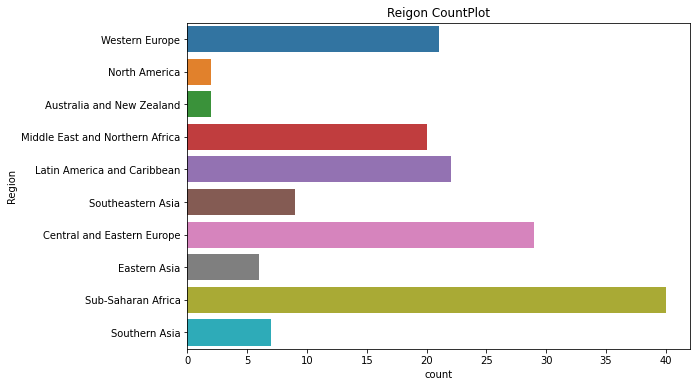

In [946]:
plt.figure(figsize=(9,6))
p = sb.countplot(data=data, y = 'Region')
plt.title('Reigon CountPlot')
plt.tight_layout

##### **Observations:** 
    1. Most Countries are Sub-Saharan African countries, and most parts of European countries
    2. North American, Australian. New ZeALAND countries are less in Data
    

###### Labeling Categorical Data which is Country and Region

In [947]:
labelEncoder = LabelEncoder()
data['Country'] = labelEncoder.fit_transform(data['Country'])
data['Region'] = labelEncoder.fit_transform(data['Region'])

<Figure size 432x288 with 0 Axes>

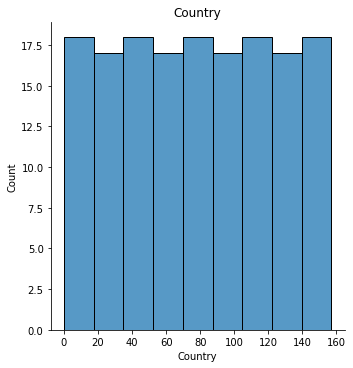

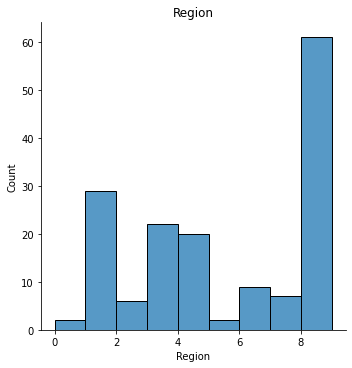

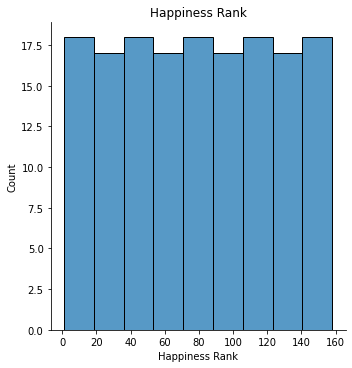

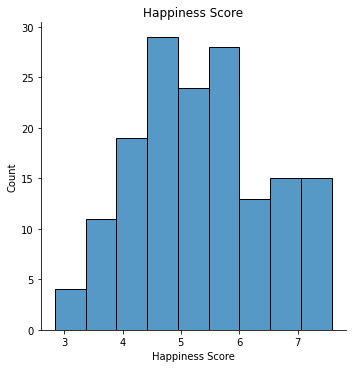

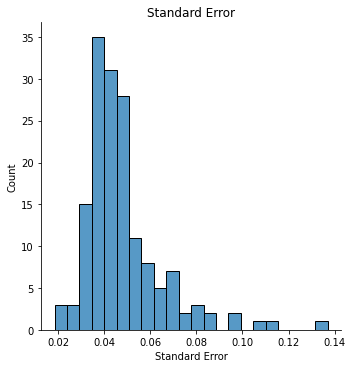

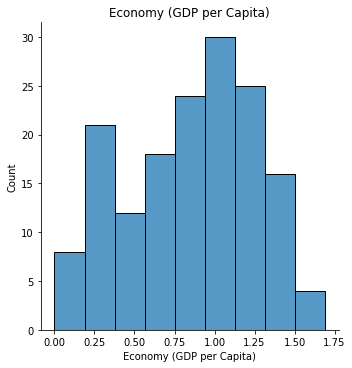

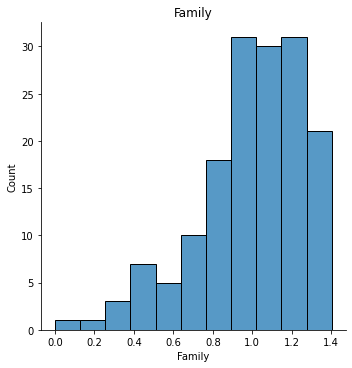

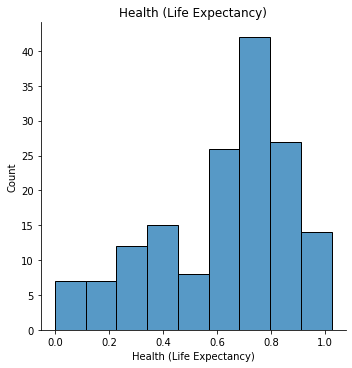

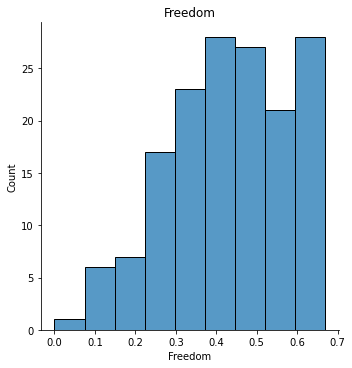

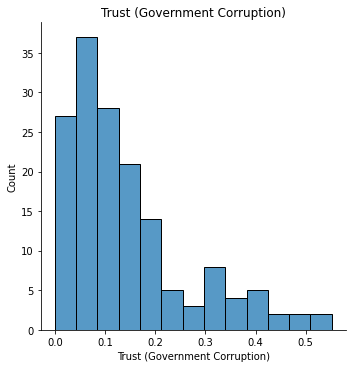

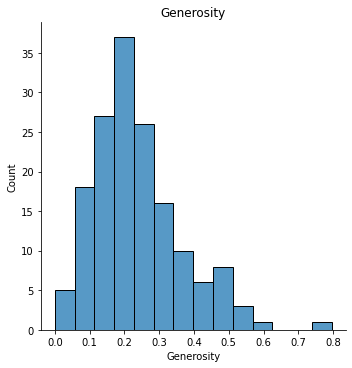

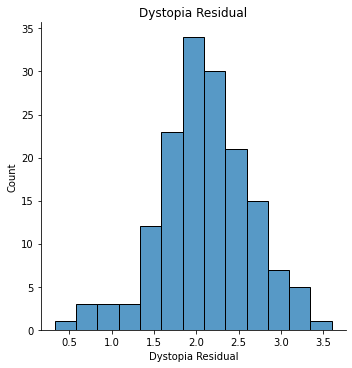

In [948]:
plt.figure()
for col in data.columns:
    sb.displot(data[col])
    plt.title(col)

##### **Observations:** 
     - Notice the Skewness in data: Standard Error(left skewed), Family(Right Skewed), Trust(left skewed), Generosity(left skewed)
     
    For MORE detailed information for skew() check below 

In [949]:
data.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [950]:

col = data.columns

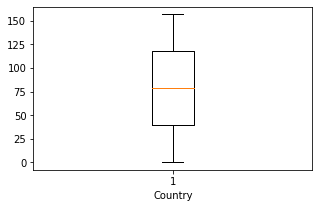

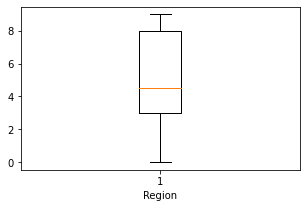

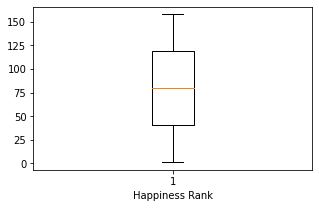

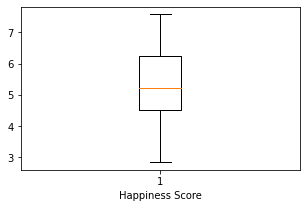

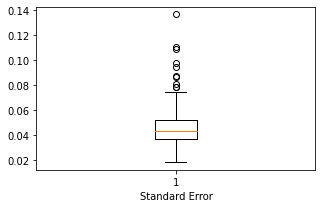

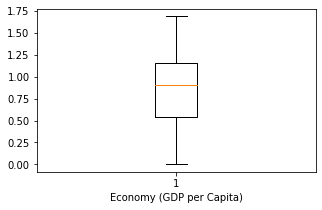

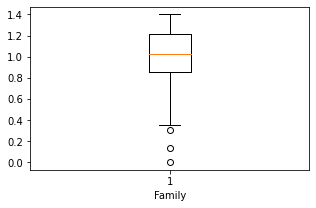

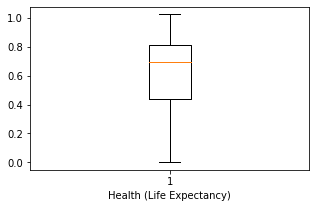

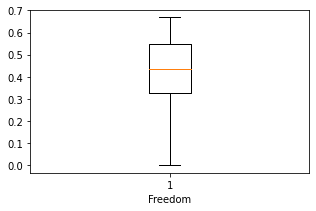

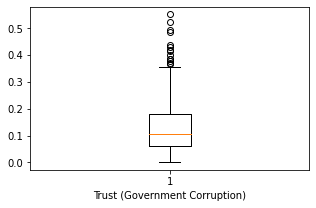

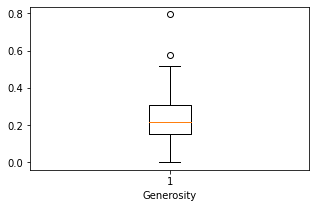

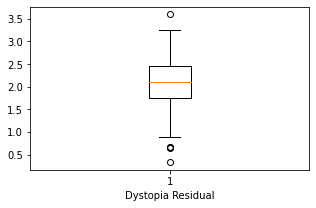

In [951]:
for i in data.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(data[i])
    plt.xlabel(i)
    

##### **OBservations**
     - Notice the outliers present in standard error, family, Trust, Generositry ans Dytopia ResiduAL,skewnness is slightly caused by the presence of outliers, 

### EDA 
    Bivariante Analysis

In [952]:
cor_table = pd.DataFrame(data.corr(),columns=data.columns)
cor_table

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

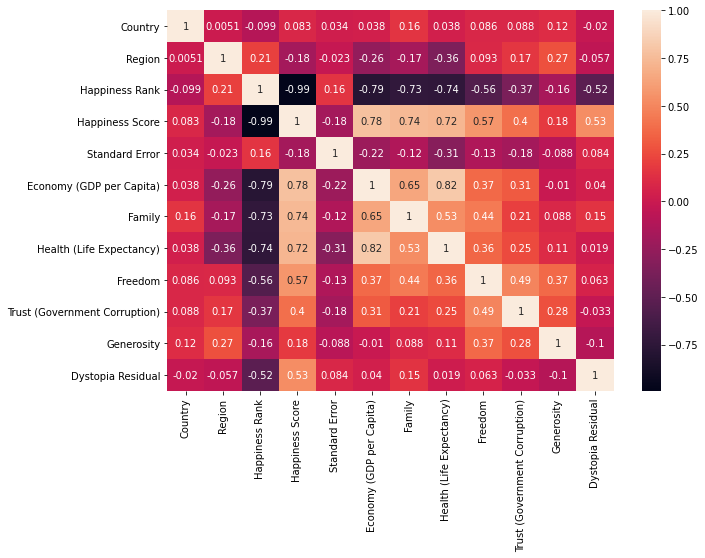

In [953]:
plt.figure(figsize=(10,7))
sb.heatmap(data.corr(),annot=True)

In [954]:
cor_table['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

##### **Observation**
    - Presence of Multicollinearity Between Features, for eg Economy and Family, Health Expentency Vs economy
    
    - AS you notice from correlation Table of Happiness Score: 6 key variable And Resudial have high correlation with Score,
    
    -  Below lets see the scatter plots of features with target Variable for the Six 6 Variable and REsidual , Standard Error
    
    
#### Plotting multicolinear features

Text(0.5, 1.0, 'Economy VS Life Expectacy')

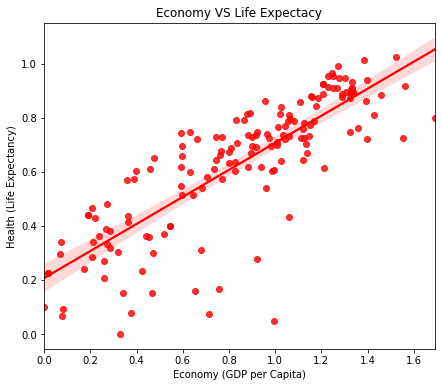

In [955]:
plt.figure(figsize=(7,6))
sb.regplot(data['Economy (GDP per Capita)'],data['Health (Life Expectancy)'],color='r')
plt.title('Economy VS Life Expectacy')


Text(0.5, 1.0, 'Economy VS Family')

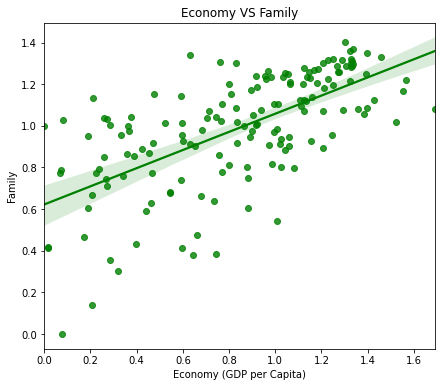

In [956]:
plt.figure(figsize=(7,6))
sb.regplot(data['Economy (GDP per Capita)'],data['Family'],color='g')
plt.title('Economy VS Family')


In [957]:

columns = ['Country', 'Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

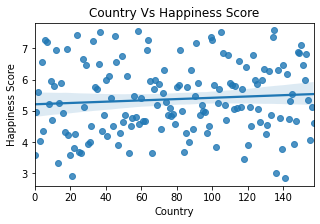

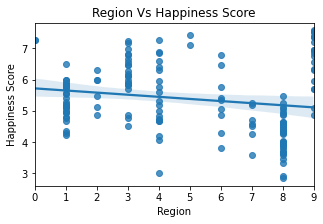

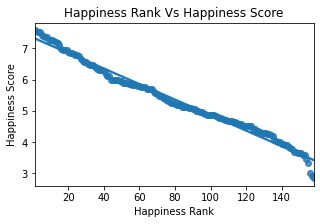

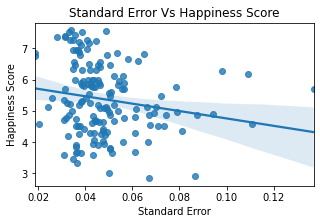

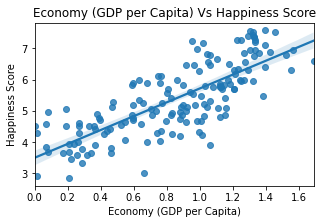

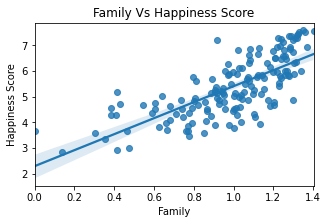

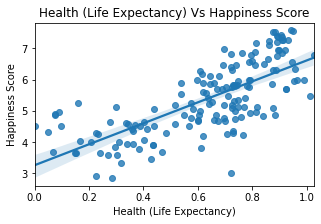

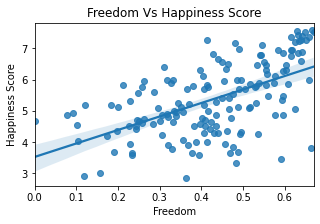

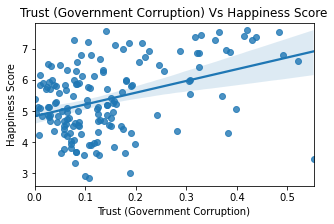

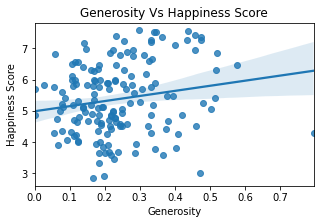

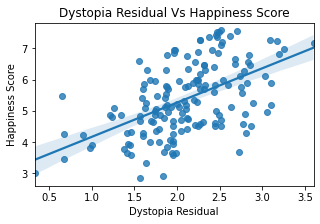

In [958]:

i = int(123)
for c in columns:
    plt.figure(figsize=(5,3))
    sb.regplot(data[c],data['Happiness Score'])
    plt.title(c+ ' Vs Happiness Score')
    plt.show()
    

##### Observations:
    - From the  regPlots, we can see how features are related to the Happiness Score, we see Positive high Correlation with all the KEy Variables and Dystopia Residual.
    - WE see some Negative Correlations like Happiness Rank with Happiness Score, Strongly Negatively Correlated , i.e lower thehappiness  Rank (The Country with most happiest Report) will have high Score, which makes sense.
    - Standard error has moderately low negative Corelative which tells us that this columns tells us less about the Happiness Score
    

Multivariant Analysis

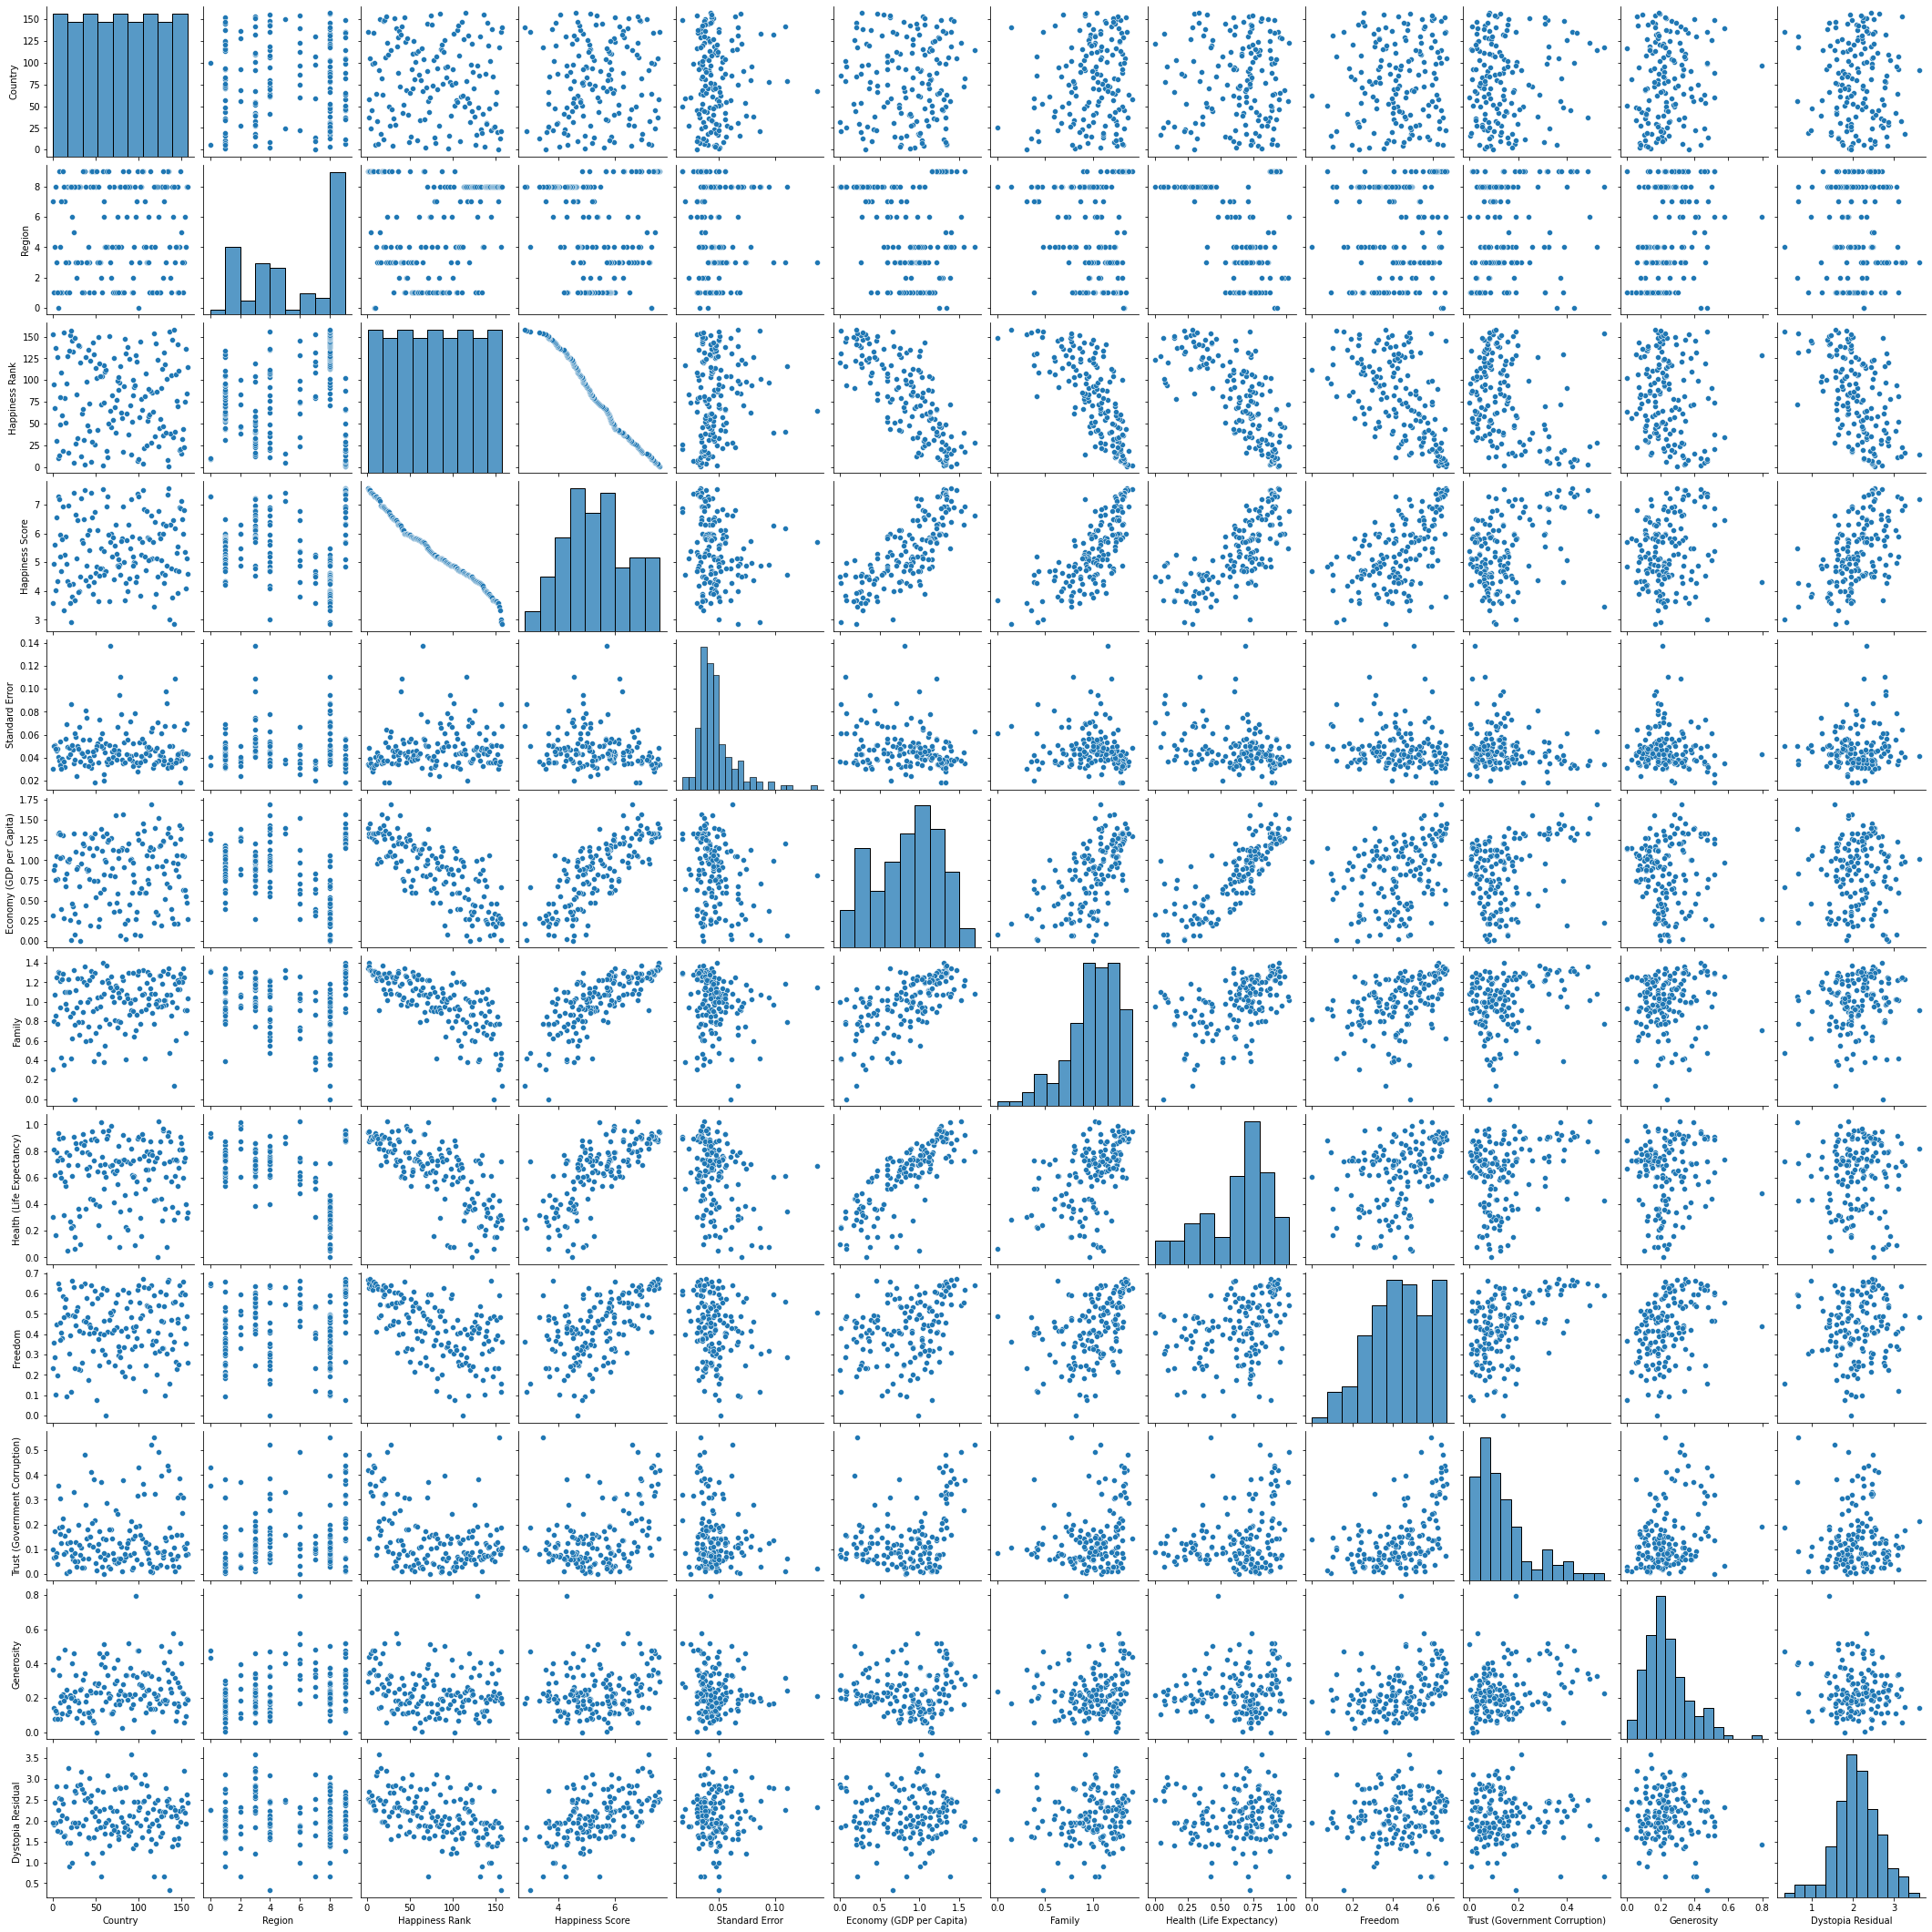

In [959]:
sb.pairplot(data)

##### **Observations**
        - As you can Observe, Happiness Rank is from 1 -159 unique Countries and 1st rank having Highest Happiness Score, Negative corelation can be been
    - Standard Error areless negatively corelated, 
    - Observe linear relation between features with Economy Column

## STEP3: DATA CLEANING
 - Outlier Treatment

In [960]:
data.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

<AxesSubplot:>

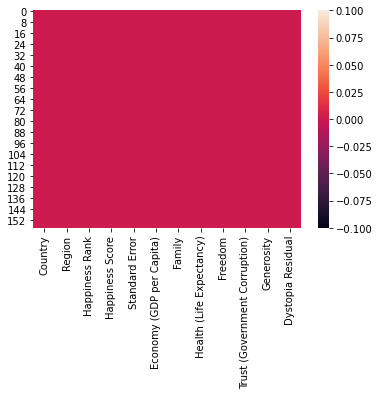

In [961]:
sb.heatmap(data.isnull())

#To Check Null values,

In [962]:
scores = np.abs(zscore(data))
t = 3
np.where(scores>3)
#9 outliers

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [963]:
#remove Outliers
new_data = data[(scores<3).all(axis=1)]

In [964]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    int32  
 1   Region                         149 non-null    int32  
 2   Happiness Rank                 149 non-null    int64  
 3   Happiness Score                149 non-null    float64
 4   Standard Error                 149 non-null    float64
 5   Economy (GDP per Capita)       149 non-null    float64
 6   Family                         149 non-null    float64
 7   Health (Life Expectancy)       149 non-null    float64
 8   Freedom                        149 non-null    float64
 9   Trust (Government Corruption)  149 non-null    float64
 10  Generosity                     149 non-null    float64
 11  Dystopia Residual              149 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 14

In [965]:
new_data.reset_index()

,index,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
145,151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
146,152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
147,154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


  ##### **NOTE**
    - TO COMPARE SKEWNESS BEFORE AND AFTER THE OUTLIER TREATMENT
    - Skewness Reduced is less.

In [966]:
data.skew(), new_data.skew()

(Country                          0.000000
 Region                          -0.116119
 Happiness Rank                   0.000418
 Happiness Score                  0.097769
 Standard Error                   1.983439
 Economy (GDP per Capita)        -0.317575
 Family                          -1.006893
 Health (Life Expectancy)        -0.705328
 Freedom                         -0.413462
 Trust (Government Corruption)    1.385463
 Generosity                       1.001961
 Dystopia Residual               -0.238911
 dtype: float64,
 Country                          0.048701
 Region                          -0.096985
 Happiness Rank                   0.003268
 Happiness Score                  0.169740
 Standard Error                   1.243048
 Economy (GDP per Capita)        -0.390657
 Family                          -0.811340
 Health (Life Expectancy)        -0.747711
 Freedom                         -0.400867
 Trust (Government Corruption)    1.272530
 Generosity                       0.6

##### **NOTE**
    - AS Regression Follow an assumption that Data to be Gaussian Like, We need to Remove Skewness
       throughSkewNess Transformation = LogTransformation/sqrt/cuberoot
       CHECK POWER TRANSFORMER BELOW WHICH DOES LOG TRANSFORMATION as no negative values are present

In [967]:
power = PowerTransformer()
for i in new_data.columns:
    if np.abs(new_data[i].skew()) > 0.5:
        new_data[[i]] = power.fit_transform(new_data[[i]])

In [968]:
data.skew(), new_data.skew()

(Country                          0.000000
 Region                          -0.116119
 Happiness Rank                   0.000418
 Happiness Score                  0.097769
 Standard Error                   1.983439
 Economy (GDP per Capita)        -0.317575
 Family                          -1.006893
 Health (Life Expectancy)        -0.705328
 Freedom                         -0.413462
 Trust (Government Corruption)    1.385463
 Generosity                       1.001961
 Dystopia Residual               -0.238911
 dtype: float64,
 Country                          0.048701
 Region                          -0.096985
 Happiness Rank                   0.003268
 Happiness Score                  0.169740
 Standard Error                  -0.031216
 Economy (GDP per Capita)        -0.390657
 Family                          -0.148528
 Health (Life Expectancy)        -0.190663
 Freedom                         -0.400867
 Trust (Government Corruption)    0.174593
 Generosity                       0.0

##### **Observations** 
    -- After Power Transformer, i.e log transformation of data which were skewed removed all skewness, making the data Gaussuan like. 
     
     
     -- After Removing Skewness, We Scale the Data

In [969]:
y = new_data['Happiness Score'].values
y = y.reshape(-1,1)


### STEP4: Preprocessing Data / Feature Engineering
    -- Scaling the Data with Standard Scalar
    -- Choosing Features for modeling

In [970]:
scale = StandardScaler()


In [971]:
new_data.drop('Happiness Score',inplace=True,axis=1)


In [972]:
new_data

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,-0.950337,1.39651,1.658880,1.469636,0.66557,1.817625,0.659579,2.51738
1,58,9,2,0.378562,1.30232,2.009125,1.511292,0.62877,0.329676,1.562604,2.70201
2,37,9,3,-1.041401,1.32548,1.730785,1.053469,0.64938,1.953400,0.977226,2.49204
3,105,9,4,-0.471124,1.45900,1.540248,1.117188,0.66973,1.664359,1.015018,2.46531
4,24,5,5,-0.799032,1.32629,1.487718,1.242549,0.63297,1.541247,1.682150,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.563000,0.46534,-1.047195,-1.707662,0.46866,0.681035,-0.131736,1.41723
151,20,8,152,-0.068119,0.25812,-0.778550,-1.435893,0.39493,0.188577,0.012019,1.46494
152,0,7,153,-1.320810,0.31982,-2.087389,-1.352388,0.23414,-0.192843,1.134258,1.95210
154,13,8,155,-0.692726,0.28665,-2.010443,-1.309709,0.48450,-0.434498,-0.312080,1.63328


In [973]:
features = scale.fit_transform(new_data)

In [974]:
scaled_data = pd.DataFrame(features,columns=new_data.columns)
scaled_data

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.950337,1.381916,1.658880,1.469636,1.583704,1.817625,0.659579,0.756876
1,-0.417415,1.296837,-1.691535,0.378562,1.138324,2.009125,1.511292,1.338953,0.329676,1.562604,1.109300
2,-0.877145,1.296837,-1.669166,-1.041401,1.198220,1.730785,1.053469,1.476027,1.953400,0.977226,0.708507
3,0.611504,1.296837,-1.646796,-0.471124,1.543526,1.540248,1.117188,1.611371,1.664359,1.015018,0.657485
4,-1.161739,-0.026647,-1.624427,-0.799032,1.200315,1.487718,1.242549,1.366887,1.541247,1.682150,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.563000,-1.026255,-1.047195,-1.707662,0.274090,0.681035,-0.131736,-1.343100
145,-1.249307,0.965966,1.663911,-0.068119,-1.562163,-0.778550,-1.435893,-0.216276,0.188577,0.012019,-1.252030
146,-1.687145,0.635095,1.686281,-1.320810,-1.402596,-2.087389,-1.352388,-1.285662,-0.192843,1.134258,-0.322135
147,-1.402550,0.965966,1.731020,-0.692726,-1.488379,-2.010443,-1.309709,0.379439,-0.434498,-0.312080,-0.930702


**NOTE**
###### NEED FOR PCA: 
    - AS you Notice Multicollinearity Existed in the data between Features, and Regression Problem Feature should have independent features, PCA not only works as Dimension Reduction, It also Reduces Multicolinearity between Features
    - As No of features present is not Large, we can skip the part of dimensionality reduction .
    

In [975]:
pca = PCA(n_components=11)
data_pca = pca.fit_transform(scaled_data)
pca_scaled = pd.DataFrame(data_pca,columns=['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7','Feature8','Feature9','Feature10','Feature11'])

<AxesSubplot:>

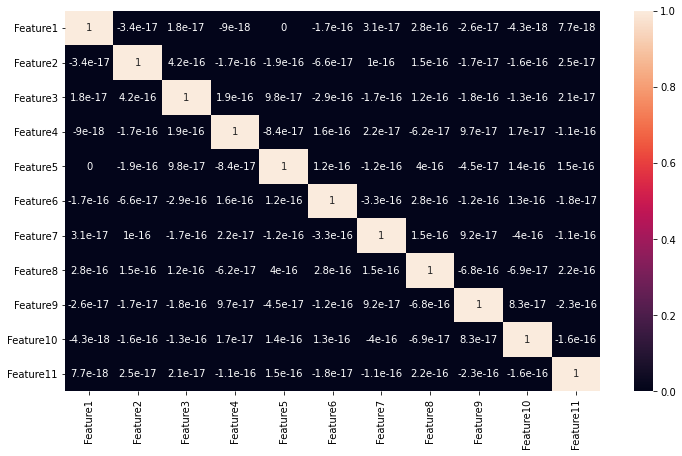

In [976]:
plt.figure(figsize=(12,7))
sb.heatmap(pca_scaled.corr(),annot=True)

##### **OBSERVATION**
    - MUlticollinearity Removed
 

### STEP5: Modeling Data

    -- Find Best Random State for fitting to a model,fitting through a model of any choice in a loop of (1,200) generated Random States to find the BEst random fit for a Model

In [977]:
pca_scaled

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11
0,-4.042287,-1.533479,0.449840,0.466969,0.366293,-1.025554,0.622307,0.093422,0.089551,-0.224205,-0.140720
1,-3.468384,-1.127426,0.675440,-0.534622,-0.372446,1.245288,1.461548,-0.008088,-0.026522,-0.348213,-0.245624
2,-3.688717,-1.691809,-0.041712,-1.435038,0.170140,-0.353858,0.592691,-0.223031,-0.474344,-0.060033,-0.024544
3,-3.760181,-1.628992,0.395848,-0.008587,-0.123056,-0.513145,0.729969,0.109247,0.041256,0.171203,-0.134579
4,-3.628828,-1.049674,-0.171897,-1.402174,-0.140975,0.673983,-0.353067,0.158773,-0.627047,0.066276,-0.102583
...,...,...,...,...,...,...,...,...,...,...,...
144,2.468328,-1.674758,-0.648257,-0.120790,-0.962966,-0.836050,-0.224477,-0.523488,0.152496,0.348300,-0.044538
145,2.697224,-1.447820,-1.082848,-0.885055,-0.259752,-0.172879,-0.096430,-0.676898,-0.312236,-0.182259,0.052942
146,3.103180,-1.392312,-1.088275,-1.531403,1.448925,0.632696,-0.725670,0.783354,-0.428187,0.379306,-0.082403
147,2.989644,-1.274381,-1.270243,-1.214078,0.525772,-0.108190,-0.466151,-0.638010,1.035521,0.088997,0.056129


In [978]:
randomstate = 0
max_score = 0
lr = LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Best Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Best Random State= 37  and R2 Score of LR MODEL :  99.86443839164833


In [979]:
x_train,x_test,y_train,y_test = train_test_split(pca_scaled,y,test_size=.30,random_state = 37)

##### **Find Best Model**
    -  Choosing Various Regression models, checking the Training Score with Cross Validation and Testing Score with r2Score metrics and comapring both to get the best model with least error

In [1003]:
models = [LinearRegression(),Lasso(),Ridge(alpha=.1),ElasticNet(),RandomForestRegressor(n_estimators=100),AdaBoostRegressor(n_estimators=100),
                      SVR(kernel= 'linear', gamma= .001, C= 1),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=11)]

In [1004]:
r2_scores = []
cv_scores = []
for model in models:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    score = r2_score(y_test,pred_model)
    print('r2 Score of Model ',model, 'is : ',score*100)
    r2_scores.append(score)
    print('MEAN SQUARED ERROR OF ',model ,' is : ',mean_squared_error(y_test,pred_model))
    cv_scores.append(np.mean(cross_val_score(model,scaled_data,y,cv=5,scoring='r2')))

r2 Score of Model  LinearRegression() is :  99.86443839164833
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0020713580161726406
r2 Score of Model  Lasso() is :  60.21847038180923
MEAN SQUARED ERROR OF  Lasso()  is :  0.6078549175699327
r2 Score of Model  Ridge(alpha=0.1) is :  99.86351551377267
MEAN SQUARED ERROR OF  Ridge(alpha=0.1)  is :  0.00208545943108606
r2 Score of Model  ElasticNet() is :  75.51981549226359
MEAN SQUARED ERROR OF  ElasticNet()  is :  0.3740530009495298
r2 Score of Model  RandomForestRegressor() is :  90.57441276730952
MEAN SQUARED ERROR OF  RandomForestRegressor()  is :  0.14402134873555547
r2 Score of Model  AdaBoostRegressor(n_estimators=100) is :  91.01513282974899
MEAN SQUARED ERROR OF  AdaBoostRegressor(n_estimators=100)  is :  0.13728722212462047
r2 Score of Model  SVR(C=1, gamma=0.001, kernel='linear') is :  99.78063634968076
MEAN SQUARED ERROR OF  SVR(C=1, gamma=0.001, kernel='linear')  is :  0.003351838777000281
r2 Score of Model  DecisionTreeRegre

In [1005]:
cv_scores

[0.8979069986324456,
 -19.68983712882,
 0.8972056898670235,
 -12.594958469223585,
 -1.780423872188008,
 -2.7974270986945142,
 0.84188778115041,
 -1.5518047157684993,
 -4.8742776924217]

In [1006]:
dif = []
for i in range(0,9):
    diff = r2_scores[i] - cv_scores[i]
    dif.append(diff)
dic_ = {'r2_score': r2_scores,
         'cv_scores': cv_scores,
          'Diff in Scores': dif
       }

In [1007]:

table = pd.DataFrame(dic_, index=['LR','LAS','Rid','EN','RF','ABR','SVR','DTR','KNR'])

In [1008]:
table

,r2_score,cv_scores,Diff in Scores
LR,0.998644,0.897907,0.100737
LAS,0.602185,-19.689837,20.292022
Rid,0.998635,0.897206,0.101429
EN,0.755198,-12.594958,13.350157
RF,0.905744,-1.780424,2.686168
ABR,0.910151,-2.797427,3.707578
SVR,0.997806,0.841888,0.155919
DTR,0.824399,-1.551805,2.376204
KNR,0.909677,-4.874278,5.783955


##### Observations : TO CHECK OVERFITTING
    - Most of the models are suffering from overfitting, as thier Training score is Very less, in negative and TEsting Score is high.
    - LINear Regression/SVR OR Ridge having least difference  having LEss error Term, having Testing and Training score both in range and having no error term.
    - MODEL CHOSEN  is LINearRegression

### STEP6:  Evaluation The Model
    - After choosing the Best model, evaluate the Model

In [1009]:

Linear_Model = LinearRegression()
Linear_Model.fit(x_train,y_train)
pred_model = Linear_Model.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2')))
print('Difference:' ,( score - np.mean(cross_val_score(Linear_Model,pca_scaled,y,cv=5,scoring='r2') )))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8979069986324457
Difference: 0.10073738528403764
r2 Score of Model  LinearRegression() is :  0.9986443839164834
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.0020713580161726406
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.04551217437315691
MEAN Absolute ERROR OF  LinearRegression()  is :  0.03650639079563133


#### TUNING PARAMETER For the SVR Model / Ridge Model
    -- To Compare Models

In [1010]:
svr= SVR()
params = {'kernel': ['linear','rbf'],
           'C': [1,10,.1,.001,.01],
          'gamma':[1,10,.1,.001,.01]
         
         }
search = RandomizedSearchCV(svr,params,cv=5,scoring='r2',n_iter=40)

In [1011]:
search.fit(pca_scaled,y)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=40,
                   param_distributions={'C': [1, 10, 0.1, 0.001, 0.01],
                                        'gamma': [1, 10, 0.1, 0.001, 0.01],
                                        'kernel': ['linear', 'rbf']},
                   scoring='r2')

In [1012]:
search.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 1}

In [1013]:
ridge= Ridge()
params = {'alpha': [1,.1,.001,10,.0001]         }
grid = GridSearchCV(ridge,params,cv=5,scoring='r2')

In [1014]:
grid.fit(pca_scaled,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 10, 0.0001]}, scoring='r2')

In [1015]:
grid.best_params_

{'alpha': 0.0001}

In [1016]:

ridge = Ridge(alpha = .0001)
ridge.fit(x_train,y_train)
pred_model = ridge.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2')))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('Difference:' ,( score - np.mean(cross_val_score(ridge,pca_scaled,y,cv=5,scoring='r2') )))
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8979063402044416
r2 Score of Model  LinearRegression() is :  0.9986443753708548
Difference: 0.10073803516641322
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.002071371073745702
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.045512317824361596
MEAN Absolute ERROR OF  LinearRegression()  is :  0.03650639657188152


In [1017]:

svr = SVR(kernel= 'linear', gamma= .001, C= 1)
svr.fit(x_train,y_train)
pred_model = svr.predict(x_test)
score = r2_score(y_test,pred_model)
print('CV_Score',np.mean(cross_val_score(svr,pca_scaled,y,cv=5,scoring='r2')))
print('r2 Score of Model ',Linear_Model, 'is : ',score)
print('Difference:' ,( score - np.mean(cross_val_score(svr,pca_scaled,y,cv=5,scoring='r2') )))
print('MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',mean_squared_error(y_test,pred_model))
print('Root MEAN SQUARED ERROR OF ',Linear_Model ,' is : ',np.sqrt(mean_squared_error(y_test,pred_model)))
print('MEAN Absolute ERROR OF ',Linear_Model ,' is : ',mean_absolute_error(y_test,pred_model))

CV_Score 0.8418877811503501
r2 Score of Model  LinearRegression() is :  0.9978063634968076
Difference: 0.1559185823464575
MEAN SQUARED ERROR OF  LinearRegression()  is :  0.003351838777000281
Root MEAN SQUARED ERROR OF  LinearRegression()  is :  0.057895066948750316
MEAN Absolute ERROR OF  LinearRegression()  is :  0.04813899139495883


##### Observations:
    - After Tuning Paramter in SVR Model the difference between the training and testing score is .155  and that of linear Regression and Lasso is .1007 approximately,
    -We can Choose Either of Linear / Ridge Regression
    - I choose Ridge Regression as it might help to provide optimum future predictions for following year and also if no of Features increases or no of data/ Countries increase, Ridge would provide more optimum prediction than Linear Regression.

### STEP 7: SERIALIZATION
    -- dump the model trained through JOBLIB

In [1018]:
joblib.dump(ridge,'world_happiest_record_Ridge.pk')

['world_happiest_record_Ridge.pk']

**NOTE**
    - We can load the model and test for future Predictions for same

In [1019]:
lg = joblib.load('world_happiest_record_Ridge.pk')

**THANK YOU**
